In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os.path
import math
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn.neighbors import KernelDensity
plt.close("all")
data = pd.read_csv("bottle.csv") 

(a) We want to find the best linear MMSE estimator of salinity with temperature. We will plot the line and the scatter plot of data on the same graph.

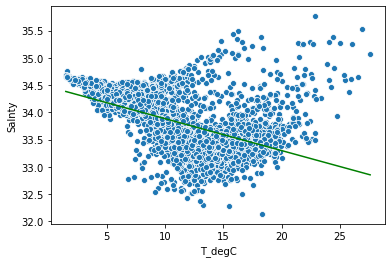

In [9]:
MMSE = []
for a in range(len(data)):
    pearson = np.corrcoef(data['T_degC'], data['Salnty'])[1,0]
    mu_a = np.mean(data['T_degC'])
    mu_b = np.mean(data['Salnty'])
    std_a = np.std(data['T_degC'])
    std_b = np.std(data['Salnty'])
    MMSE.append((pearson * std_b * (data.iloc[a,0] - mu_a))/std_a + mu_b)

a = data['T_degC']
    
fig = plt.figure()
ax = sns.lineplot(data = data, x = a, y = MMSE, color = 'g')
ax = sns.scatterplot(data = data, x = a, y = data['Salnty'])

According to the relationship youuncovered, salinity does not increase as temperature increases.

(b) We want to plot an estimate of the conditional mean of salinity given the temperature alongwith the scatter plot of data.

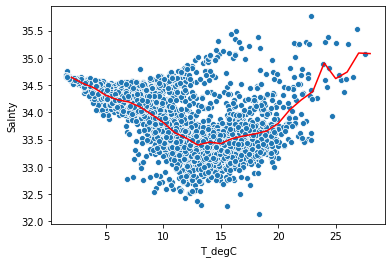

In [10]:
data['rounded'] = round(data['T_degC'])

cond_mean = pd.DataFrame(data.groupby('rounded').mean()['Salnty'])
x = np.arange(2,29,1)

fig = plt.figure()
ax = sns.lineplot(data = cond_mean, x = x, y = cond_mean['Salnty'], color = 'r')
ax = sns.scatterplot(data = data, x = a, y = data['Salnty'])

From the conditional mean estimator, there is a decreasing trend up till 15 degrees C. Past this point, the mean starts increasing.

(c) We want to assess whether the conditional mean estimates equally reliable at every point.

The conditional mean estimate is less reliable on extreme values of temperature. There are less data points when given a specific temperature and therefore the estimate has a higher chance to be inaccurate. The conditional mean estimate is more reliable towards the center of the data because there is a robust number of data points and there is less of a chance of the estimate to deviate from the real mean.

(d) We want to assess why the trend we find is different from what Sciencing suggests.

The oceanographic data we have may not be sampled well. The dataset's purpose seemes to be for fish larvae. Also, the temperature of from the areas the data was sampled might not have extreme temperatures, thus we have less data on salinity of cold waters.